# Part III: Training a model

Date: 23/08/2022

Authors: Jordi Bolibar & Facundo Sapienza

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Setup

At this point, `df_all` has all the data we will need to train, validate and test the model. However, before moving forward to training a machine learning model with this data, we need to separate an part of the dataset for testing the model and be sure we are not overfitting the model. 

For testing, we can use different strategies:
1. Separate all the measurements for some given set of glaciers and use all the rest for training/validation
1. Separate all the measurements for some given set of glaciers at period (2010-2020) and use all the rest for trainign/validation
1. Separate all the measurements for some given set of glaciers at the period 2010-2020 and use all the measurements for rest of the glaciers and the other period 2000-2010 for training/validation.

For simplicity, in this notebook we are going to implement the first one, but this may not be necessaraly the best option (why?). 

array([[<AxesSubplot:title={'center':'err_dmdtda'}>]], dtype=object)

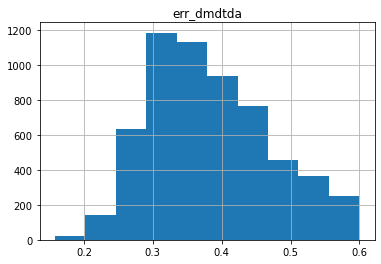

In [225]:
#df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
#df_all

#df_all = df_all[df_all['err_dmdtda'] <= 0.6]

#df_all.hist('err_dmdtda')


In [226]:
# We select a subset of glaciers and use them for test and the rest for training
#glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

#glacier_train, glacier_test = train_test_split(glaciers_ids_all, 
#                                               train_size=0.3,
#                                               test_size=0.7)

#df_train_all = df_all.loc[glacier_train]
#df_test = df_all.loc[glacier_test]
#df_train_all.shape, df_test.shape

((1752, 38), (4114, 38))

Now we save the test dataset into a file in order to put it aside.

In [227]:
#df_test.to_csv('Data/df_test.csv')
#df_train_all.to_csv('Data/df_train_all.csv')

In [228]:
df_train_all = pd.read_csv('Data/df_train_all.csv', index_col=['rgi_id', 'period'])
df_train_all

PDD   area  icecap     lat     lon  \
rgi_id         period                                                
RGI60-08.00855 2000-2010  49.772800  0.754     0.0  61.752   8.174   
               2010-2020  48.806800  0.754     0.0  61.752   8.174   
RGI60-08.00284 2000-2010  50.198113  1.036     0.0  66.546  14.497   
               2010-2020  50.039557  1.036     0.0  66.546  14.497   
RGI60-08.01518 2000-2010  40.302047  0.050     0.0  66.790  14.553   
...                             ...    ...     ...     ...     ...   
RGI60-08.01174 2010-2020  55.879846  0.353     0.0  61.861   7.230   
RGI60-08.01690 2000-2010  38.201666  0.149     0.0  60.736   7.280   
               2010-2020  37.443333  0.149     0.0  60.736   7.280   
RGI60-08.03155 2000-2010  41.706430  0.133     0.0  65.368  13.133   
               2010-2020  41.360007  0.133     0.0  65.368  13.133   

                             prcp_01     prcp_02     prcp_03     prcp_04  \
rgi_id         period                                                      
RGI60-08.00855 2000-2010   98.155992   97.431399   93.727513  101.434631   
               2010-2020   95.760616   83.802870   97.767036   78.083405   
RGI60-08.00284 2000-2010  177.556147  195.367397  198.264223  195.481022   
               2010-2020  194.973485  157.806579  212.347313  139.825914   
RGI60-08.01518 2000-2010  171.017577  183.719187  187.798943  183.491316   
...                              ...         ...         ...         ...   
RGI60-08.01174 2010-2020  149.216654  132.893787  178.609721  128.084938   
RGI60-08.01690 2000-2010  171.013151  149.865191  152.839703  160.394624   
               2010-2020  158.911092  129.544313  157.749670  120.959889   
RGI60-08.03155 2000-2010  166.893368  178.875896  183.545535  189.663024   
               2010-2020  175.075336  143.109660  202.132780  138.779159   

                             prcp_05  ...   temp_09    temp_10    temp_11  \
rgi_id         period                 ...                                   
RGI60-08.00855 2000-2010   65.590466  ...  9.704667  12.418000  11.544666   
               2010-2020   59.111968  ...  9.514667  12.138000  11.264666   
RGI60-08.00284 2000-2010  148.502981  ...  8.828889  12.234816  11.557778   
               2010-2020  133.978220  ...  8.463333  11.963704  11.344445   
RGI60-08.01518 2000-2010  141.239106  ...  7.373111  10.870890  10.212000   
...                              ...  ...       ...        ...        ...   
RGI60-08.01174 2010-2020   99.625573  ...  9.858001  12.441334  11.866888   
RGI60-08.01690 2000-2010  100.742037  ...  7.516665  10.193334   9.736666   
               2010-2020   90.256486  ...  7.406665   9.923335   9.396666   
RGI60-08.03155 2000-2010  135.806936  ...  7.763851  10.810149  10.450518   
               2010-2020  124.610193  ...  7.467185  10.635704  10.251629   

                           temp_12    zmax    zmed    zmin  dmdtda  \
rgi_id         period                                                
RGI60-08.00855 2000-2010  7.168000  1923.0  1822.0  1751.0 -0.3601   
               2010-2020  7.378000  1923.0  1822.0  1751.0 -0.2904   
RGI60-08.00284 2000-2010  7.490000  1277.0  1151.0  1070.0 -1.0001   
               2010-2020  8.235556  1277.0  1151.0  1070.0  0.1495   
RGI60-08.01518 2000-2010  6.008667  1036.0  1019.0   996.0  0.2634   
...                            ...     ...     ...     ...     ...   
RGI60-08.01174 2010-2020  8.385778  1733.0  1630.0  1576.0 -0.5223   
RGI60-08.01690 2000-2010  5.746666  1579.0  1543.0  1500.0 -0.7835   
               2010-2020  5.956666  1579.0  1543.0  1500.0 -0.1401   
RGI60-08.03155 2000-2010  6.195704   973.0   939.0   919.0 -0.0454   
               2010-2020  6.833481   973.0   939.0   919.0 -0.3131   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-08.00855 2000-2010      0.2903     1708.0  
               2010-2020      0.3110     1709.0  
RGI60-08.00284 2000

Now we are going to train the models based on the train dataset, which will have to be split again into train and validation.

In [229]:
glaciers_ids = np.unique(df_train_all.index.get_level_values(0).values)

train_dataset, validation_dataset = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[train_dataset]
df_validation = df_all.loc[validation_dataset]
df_train.shape, df_validation.shape

((1399, 38), (353, 38))

In [232]:
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [233]:
df_train_X

PDD   area  icecap     lat     lon  \
rgi_id         period                                                
RGI60-08.03316 2000-2010  45.570180  0.604     0.0  62.095   7.722   
               2010-2020  44.674891  0.604     0.0  62.095   7.722   
RGI60-08.02611 2000-2010  72.846786  0.063     0.0  68.571  16.033   
               2010-2020  73.593008  0.063     0.0  68.571  16.033   
RGI60-08.02703 2000-2010  79.536706  0.088     0.0  62.055   6.635   
...                             ...    ...     ...     ...     ...   
RGI60-08.00382 2010-2020  33.852046  0.135     0.0  61.755   7.846   
RGI60-08.02984 2000-2010  65.898576  4.307     0.0  61.041   6.774   
               2010-2020  65.588865  4.307     0.0  61.041   6.774   
RGI60-08.01526 2000-2010  41.954971  0.595     0.0  66.658  14.538   
               2010-2020  41.775052  0.595     0.0  66.658  14.538   

                             prcp_01     prcp_02     prcp_03     prcp_04  \
rgi_id         period                                                      
RGI60-08.03316 2000-2010  119.993151  130.640124  138.510596  143.627505   
               2010-2020  120.521092  109.188606  144.810444  105.811098   
RGI60-08.02611 2000-2010  145.025770  144.123376  145.735356  141.285052   
               2010-2020  160.490660  127.607101  152.507884  104.329323   
RGI60-08.02703 2000-2010  203.384143  224.958175  241.323683  232.489418   
...                              ...         ...         ...         ...   
RGI60-08.00382 2010-2020  117.428912  103.599326  126.823439   98.974209   
RGI60-08.02984 2000-2010  208.560000  196.120727  200.251825  206.131678   
               2010-2020  200.179425  168.528494  208.480443  153.558994   
RGI60-08.01526 2000-2010  159.905287  177.234632  180.387858  179.008132   
               2010-2020  174.913671  143.377756  193.216298  128.555372   

                             prcp_05  ...   temp_06   temp_07   temp_08  \
rgi_id         period                 ...                                 
RGI60-08.03316 2000-2010   95.208697  ... -3.885778  0.562000  4.930889   
               2010-2020   83.080255  ... -3.482445  0.145333  4.864222   
RGI60-08.02611 2000-2010  131.333467  ... -0.270296  3.639333  7.522667   
               2010-2020  111.223197  ...  0.161926  3.567111  7.910444   
RGI60-08.02703 2000-2010  163.821404  ...  1.287556  4.809778  8.610148   
...                              ...  ...       ...       ...       ...   
RGI60-08.00382 2010-2020   75.452969  ... -5.631334 -1.895778  2.895333   
RGI60-08.02984 2000-2010  130.636495  ... -0.953778  3.214000  7.527333   
               2010-2020  115.180301  ... -0.467111  2.867333  7.453999   
RGI60-08.01526 2000-2010  135.010384  ... -4.887111 -0.493037  3.748445   
               2010-2020  121.908860  ... -4.349333 -0.861926  3.919556   

                            temp_09    temp_10    temp_11    temp_12    zmax  \
rgi_id         period                                                          
RGI60-08.03316 2000-2010   8.657557  11.363111  10.793112   6.597556  1741.0   
               2010-2020   8.487556  11.076445  10.503112   6.824222  1741.0   
RGI60-08.02611 2000-2010  11.115629  14.591926  13.884890   9.758222   936.0   
               2010-2020  10.813407  14.441926  13.718223  10.758222   936.0   
RGI60-08.02703 2000-2010  11.667185  14.245704  13.962372  10.484593  1316.0   
...                             ...        ...        ...        ...     ...   
RGI60-08.00382 2010-2020   6.822001   9.529777   8.756445   5.072000  1927.0   
RGI60-08.02984 2000-2010  11.379556  13.930665  13.373999   9.405112  1660.0   
               2010-2020  11.252889  13.647332  13.063999   9.598445  1660.0   
RGI60-08.01526 2000-2010   7.787333  11.195852  10.532889   6.248445  1306.0   
               2010-2020   7.426222  10.923630  10.306222   6.999556  1306.0   

                            zmed    zmin  
rgi_id         period                     
RGI60-08.03316 2000-2010  165

## Training a model 

The `sklearn` package includes multiple regression models we can try on the dataset. One of the advantages of using `sklearn` is that the syntax and logic is shared among different algorithms, making easy to try and compare different models. The [sklearn documentation](https://scikit-learn.org/stable/auto_examples/index.html#examples) includes multiple of these examples that are worth exploring. 

Some regression methods to explore include
1. Clasical continouos regression approaches: linear regression, logistic regression, support vector machines
1. Tree-based regression: decision trees, random forest, ensamble methods based on boosting
1. Neural networks

The following plot function will be useful in order to report the performance of the different models.

In [234]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### Linear Regression

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

For linear regression and many other methods, we will scale the data to have zero mean and unit variance.

In [283]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [284]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

ElasticNet is a linear regression model that includes the classical ordinary least square error estimatior (`alpha=0.0`), Lasso (`l1_ratio=1`) and Ridge (`l1_ratio=0`) regression in one single method. 

In [122]:
%time
reg_linear = ElasticNet(alpha=0.01,
                        l1_ratio=0.9,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=666)

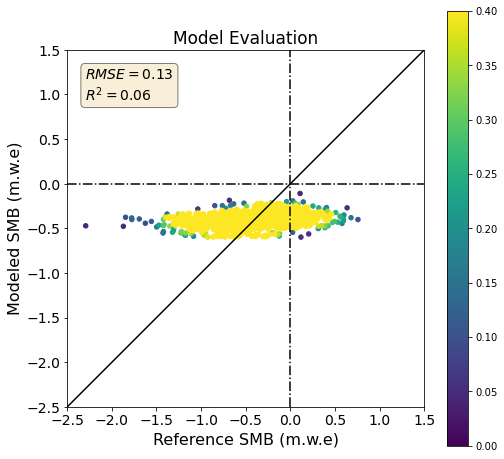

In [123]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

### Decision Tree Regressor

In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [252]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=15, 
                                 min_samples_split=5,
                                 min_samples_leaf=5,
                                 max_features=5)
reg_tree.fit(X_train, y_train)

CPU times: user 7.33 ms, sys: 276 µs, total: 7.6 ms
Wall time: 6.8 ms


DecisionTreeRegressor(max_depth=15, max_features=5, min_samples_leaf=5,
                      min_samples_split=5, random_state=0)

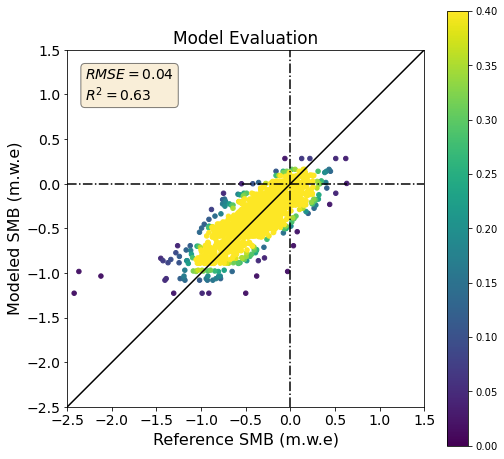

In [253]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

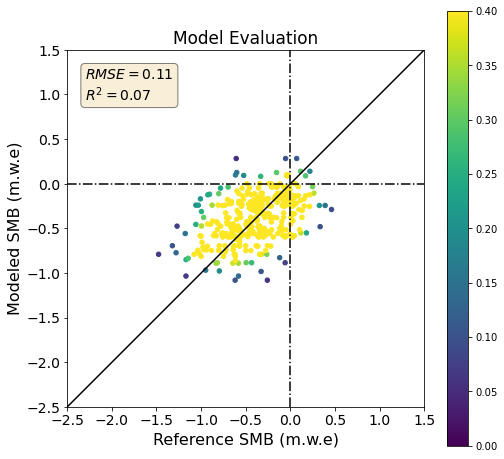

In [254]:
plot_prediction(y_validation, reg_tree.predict(X_validation), n_toplot=5000)

How well does this behave in test set?

### Ensamble of trees

We can try examples of models that combine slow learners. This models tend to work very well and be quite general. However, tunning the different hyper-parameters of the model can be tricky and something that will be explore in deeper detail in the next notebook. 

Example based on [Gradient boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py)

In [240]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [294]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "min_samples_leaf": 2,
        "subsample": 1.0,
        "learning_rate": 0.1,
        "loss": 'squared_error',#'huber', #"squared_error",
        "validation_fraction": 0.1,
        "max_features": 5
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [295]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 708 ms, sys: 3.6 ms, total: 711 ms
Wall time: 709 ms


GradientBoostingRegressor(max_depth=4, max_features=5, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=300)

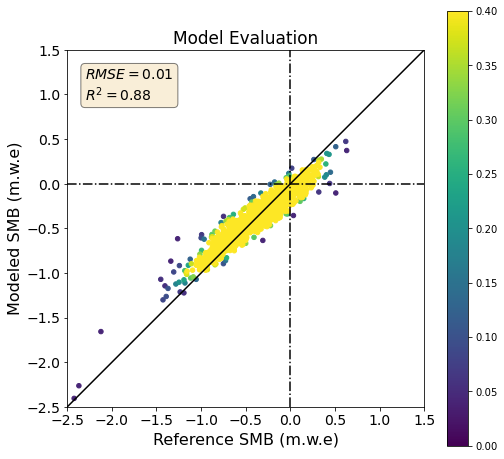

In [296]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

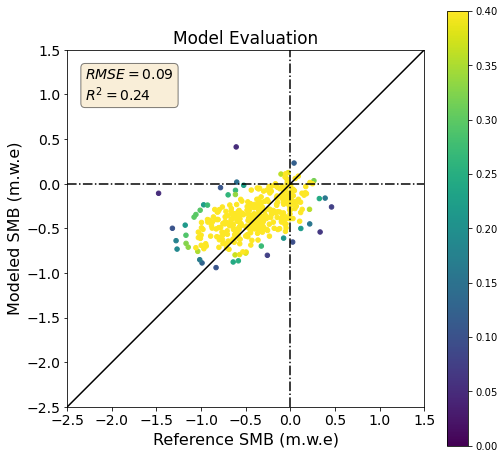

In [297]:
plot_prediction(y_validation, reg_ensemble.predict(X_validation), n_toplot=5000)

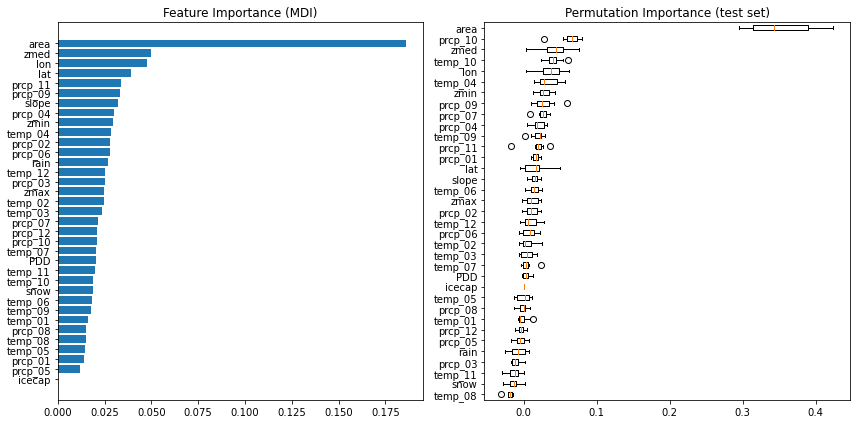

In [298]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Neural Network

In [279]:
from sklearn.neural_network import MLPRegressor

In [285]:
reg_nn = MLPRegressor(hidden_layer_sizes=(50,30,20,10),
                      activation='relu',
                      solver='lbfgs', 
                      batch_size=100, 
                      max_iter=200,
                      learning_rate='adaptive', 
                      shuffle=True, 
                      validation_fraction=0.1)

In [286]:
%%time
reg_nn.fit(X_train_scaled, y_train)

/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 3.08 s, sys: 1.98 s, total: 5.06 s
Wall time: 1.3 s


/home/jovyan/shared-public/envs/Finse_MassBalance/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

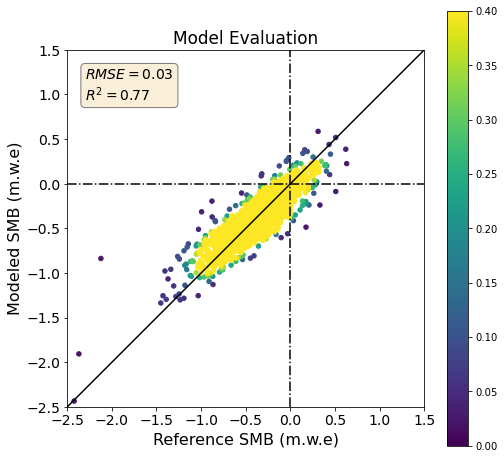

In [287]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

In [289]:
plot_prediction(y_validation, reg_nn.predict(X_test_scaled), n_toplot=5000)

ValueError: X has 31 features, but MLPRegressor is expecting 35 features as input.

### [ **Exercice 3** ]
<img src="Figures/eye_logo.png" width="75"/>

Choose 2 or 3 different ML models, and play with the hyperparameters in order to improve the performance by looking at the scatter plot. 

This is just a rough way to have a best first estimate of good hyperparameters. In the next notebook we will see how to correctly look for the best possible hyperparameters by using cross-validation. 